Load the models and their chechpoint's evals

In [1]:
%reload_ext autoreload
%autoreload 2

## Load checkpoints info from model config

In [2]:
import torch


# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50' #'resnet18'#'resnet50' #'resnext50-32x4d'#'resnet18' #'vgg16-bn' #'vgg16'#'resnet50'
        self.input_size = 224
        self.dataset_model = 'vggface2'  #'imagenet' #'vggface2'  #'imagenetvggface2' #'imagenet' #'vggface2' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_0.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = 150 #'full' #'madryfull' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32


args = Args()

if args.dataset_model == 'vggface2':
    # assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif 'imagenet' in  args.dataset_model or 'places365' in args.dataset_model:
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'input_size': args.input_size,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

from Models import load_models
_, args_loaded = load_models.load_models(model_args)
# model = torch.nn.DataParallel(model).cuda()
# _=model.eval()


chekpoint_info = torch.load(args_loaded.load_path)
print(chekpoint_info.keys())

print(chekpoint_info['adv_prec1'].item())

Kernel running on local computer 'demo'.
['/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python311.zip', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/lib-dynload', '', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages', '/home/tahereh/engram/users/Tahereh/Codes/Github/lucent', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/setuptools/_vendor', '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients']


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


args is a dictionary
get_dict_hash: dataset: vggface2, model_arch: resnet50
demo
/home/tahereh/engram/users/Tahereh/Research/Data/VGG-Face2/meta/identity_meta.csv
dict_keys(['advrobust_L2_eps_0.50', 'advrobust_L2_eps_1.00', 'advrobust_L2_eps_3.00'])


UnboundLocalError: cannot access local variable 'load_path' where it is not associated with a value

In [48]:

chekpoint_info['optimizer'].keys()

dict_keys(['state', 'param_groups'])

## Tensorboard plots

In [58]:
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

path_to_checkpoints = '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenetvggface2_eps_3.00/540a1066-2902-4ed4-9562-53d4fde58440'

log_path = os.path.join(path_to_checkpoints, 'tensorboard', 'events.out.tfevents.1726868901.ax25.rc.zi.columbia.edu')

# Load the event file
event_acc = EventAccumulator(log_path)
event_acc.Reload()

# Get available scalar tags
print(event_acc.Tags()['scalars'])

# Extract scalar values
# for tag in event_acc.Tags()['scalars']:
#     events = event_acc.Scalars(tag)
#     for e in events:
#         print(f"Step: {e.step}, Value: {e.value}")

['adv_train_loss', 'adv_train_top1', 'adv_train_top5', 'nat_val_loss', 'nat_val_top1', 'nat_val_top5', 'adv_val_loss', 'adv_val_top1', 'adv_val_top5']


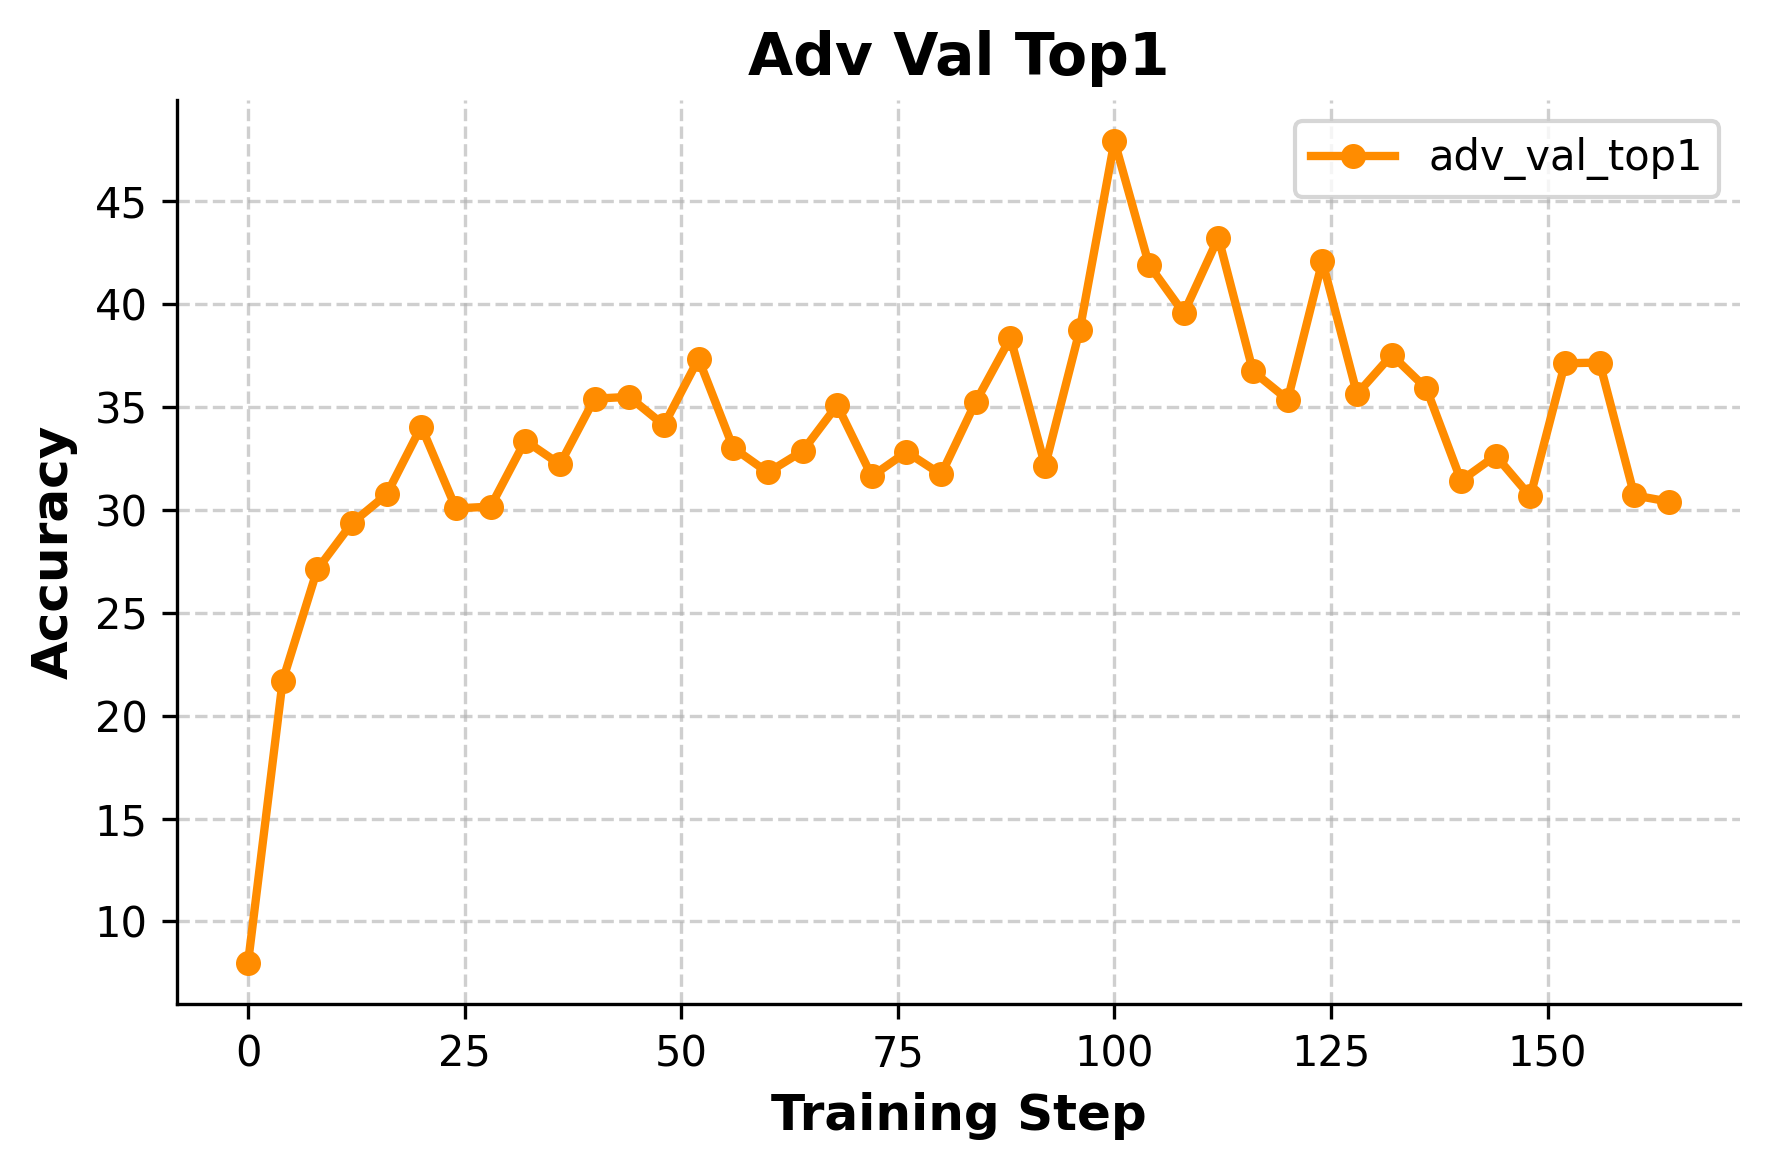

In [7]:
# Choose a scalar tag to plot (e.g., 'adv_train_loss')
selected_tag = 'adv_val_top1'  # Change this to another tag if needed

# Extract scalar values
events = event_acc.Scalars(selected_tag)
steps = np.array([e.step for e in events])
values = np.array([e.value for e in events])

# Create figure for plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot the extracted data
ax.plot(steps*2, values, marker='o', linestyle='-', linewidth=2, markersize=5, color='darkorange', label=selected_tag)

# Aesthetics for publication-quality
ax.set_xlabel("Training Step", fontsize=12, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=12, fontweight='bold')
ax.set_title(f"{selected_tag.replace('_', ' ').title()}", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10, loc="upper right")

# Save the figure (optional)
plt.tight_layout()
plt.show()

In [1]:
%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())


## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference
Kernel running on local computer 'demo'.
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


image names:  ('self', 'image_name', 'image_original', 'cmap')


In [2]:
import torch

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50' #'resnet50' 'resnext50-32x4d'
        
        self.dataset_model ='imagenet' #'Places365' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_3.00' #'standard' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        self.input_size = 224
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = 'madryfull' #'0' #'full' #176 #100#'full' # 160 for vggface IncConfMSE #'full'  98 is the highest for places365
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32


args = Args()

if args.dataset_model == 'vggface2':
    # assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif 'imagenet' in  args.dataset_model or 'Places365' in args.dataset_model:
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'input_size': args.input_size,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

from Models import load_models
model, _ = load_models.load_models(model_args)
model = torch.nn.DataParallel(model).cuda()
_=model.eval()


Kernel running on local computer 'demo'.
['/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python311.zip', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/lib-dynload', '', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages', '/home/tahereh/engram/users/Tahereh/Codes/Github/lucent', '/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/setuptools/_vendor', '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/', '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients']
args is a dictionary
get_dict_hash: dataset: imagenet, model_arch: resnet50
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/madry_robust/imagenet/L2/imagenet_l2_3_0.pt'
=> loaded checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/madr

/home/tahereh/engram/users/Tahereh/Research/Data/imagenet/val
🚀 Creating ImageNet Recognition Demo GIF...
🤖 Using model: resnet50 trained on imagenet
🛡️ Training type: advrobust_L2_eps_3.00
📁 Found 50000 images in ImageNet validation set
🔄 Processing images...


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


✅ Processed 1/8: gong (16.3%)
✅ Processed 2/8: baguette (9.5%)
✅ Processed 3/8: jellyfish (50.6%)
✅ Processed 4/8: scorpion (97.4%)
✅ Processed 5/8: King Charles Spaniel (14.0%)
✅ Processed 6/8: leopard (62.6%)
✅ Processed 7/8: paper towel (47.6%)
✅ Processed 8/8: toaster (38.4%)
💾 Saving GIF to: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/imagenet_recognition_demo.gif


/tmp/ipykernel_1009126/2597817053.py:180: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  anim.save(save_path, writer=writer)
/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


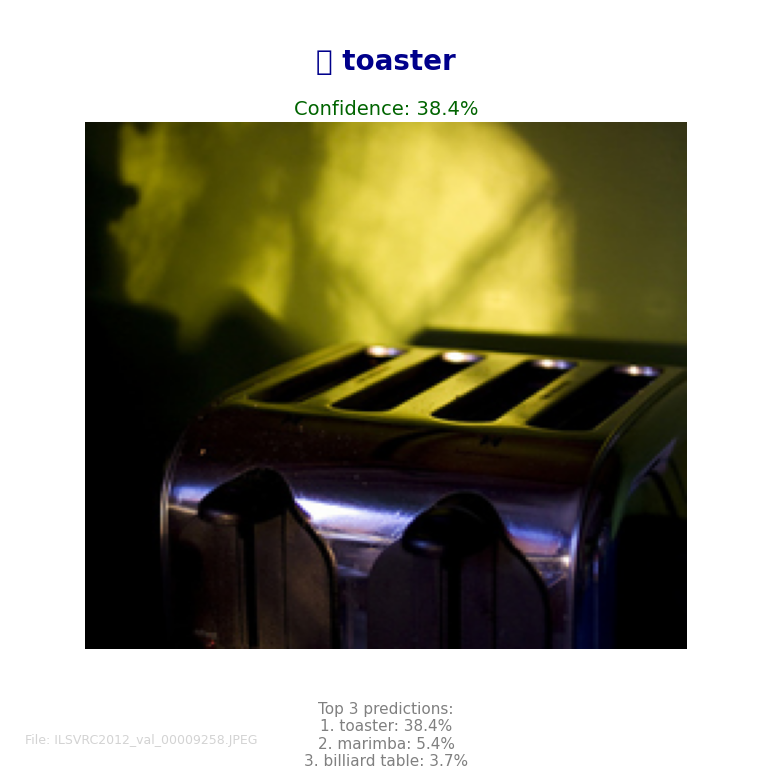

✨ GIF created successfully!
📊 Model: resnet50 (advrobust_L2_eps_3.00)
📁 Dataset: imagenet
🖼️ Images processed: 8
⏱️ Duration: 4.0s per cycle


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import torch
import torch.nn.functional as F
from torchvision import transforms
import os
import glob
import random
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# ImageNet validation dataset path - adjust this to your ImageNet location
imagenet_val_path = os.path.join(path_prefix, "Research/Data/imagenet/val")  # Update this path
print(imagenet_val_path)
if not os.path.exists(imagenet_val_path):
    # Alternative common paths
    potential_paths = [
        "/datasets/imagenet/val",
        "/data/imagenet/val", 
        os.path.join(path_prefix, "Research/Data/imagenet/val"),
        "/mnt/datasets/imagenet/val"
    ]
    for path in potential_paths:
        if os.path.exists(path):
            imagenet_val_path = path
            break
    else:
        print("⚠️ ImageNet validation path not found. Please update 'imagenet_val_path' variable.")
        imagenet_val_path = None

def load_and_preprocess_image(image_path, input_size=224):
    """Load and preprocess image for the model"""
    # Load image
    image = Image.open(image_path).convert('RGB')
    
    # Transform for model
    transform = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
    ])
    
    # Get original image for display
    display_image = image.resize((input_size, input_size))
    
    # Preprocess for model
    tensor_image = transform(image).unsqueeze(0).cuda()
    
    # Normalize
    normalized_image = (tensor_image - args.norm_mean.view(1, 3, 1, 1)) / args.norm_std.view(1, 3, 1, 1)
    
    return normalized_image, display_image

def get_top_predictions(model, image_tensor, top_k=3):
    """Get top-k predictions from the model"""
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)
        top_probs, top_indices = torch.topk(probabilities, top_k, dim=1)
    
    predictions = []
    for i in range(top_k):
        prob = top_probs[0][i].item()
        idx = top_indices[0][i].item()
        label = labels_imagenet[idx] if idx < len(labels_imagenet) else f"Class_{idx}"
        predictions.append((label, prob))
    
    return predictions

def create_demo_gif(num_images=10, gif_duration=2.0, save_path=None):
    """Create a GIF showing random ImageNet images with their predictions"""
    
    if imagenet_val_path is None:
        print("❌ Cannot create GIF: ImageNet path not found")
        return
    
    # Find all image files in ImageNet validation set
    image_extensions = ['*.JPEG', '*.jpg', '*.png', '*.jpeg']
    all_images = []
    for ext in image_extensions:
        all_images.extend(glob.glob(os.path.join(imagenet_val_path, "**", ext), recursive=True))
    
    if len(all_images) == 0:
        print(f"❌ No images found in {imagenet_val_path}")
        return
    
    print(f"📁 Found {len(all_images)} images in ImageNet validation set")
    
    # Randomly select images
    selected_images = random.sample(all_images, min(num_images, len(all_images)))
    
    # Process images and get predictions
    processed_data = []
    print("🔄 Processing images...")
    
    for i, img_path in enumerate(selected_images):
        try:
            # Load and preprocess
            tensor_img, display_img = load_and_preprocess_image(img_path, args.input_size)
            
            # Get predictions
            predictions = get_top_predictions(model, tensor_img, top_k=3)
            
            processed_data.append({
                'image': np.array(display_img),
                'predictions': predictions,
                'filename': os.path.basename(img_path)
            })
            
            print(f"✅ Processed {i+1}/{len(selected_images)}: {predictions[0][0]} ({predictions[0][1]:.1%})")
            
        except Exception as e:
            print(f"❌ Error processing {img_path}: {e}")
            continue
    
    if len(processed_data) == 0:
        print("❌ No images were successfully processed")
        return
    
    # Create the animated plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    # Create text objects
    title_text = ax.text(0.5, 0.95, '', fontsize=20, fontweight='bold', 
                        ha='center', va='top', color='darkblue')
    confidence_text = ax.text(0.5, 0.88, '', fontsize=14, 
                             ha='center', va='top', color='darkgreen')
    top3_text = ax.text(0.5, 0.08, '', fontsize=11, 
                       ha='center', va='top', color='gray')
    filename_text = ax.text(0.02, 0.02, '', fontsize=9, 
                           ha='left', va='bottom', color='lightgray')
    
    # Image display
    im_display = ax.imshow(np.zeros((224, 224, 3)), extent=[0.1, 0.9, 0.15, 0.85])
    
    def animate(frame):
        data = processed_data[frame % len(processed_data)]
        
        # Update image
        im_display.set_array(data['image'])
        
        # Update texts
        top_pred = data['predictions'][0]
        title_text.set_text(f"🎯 {top_pred[0]}")
        confidence_text.set_text(f"Confidence: {top_pred[1]:.1%}")
        
        # Show top 3 predictions
        top3_str = "Top 3 predictions:\n"
        for i, (label, prob) in enumerate(data['predictions'][:3]):
            top3_str += f"{i+1}. {label}: {prob:.1%}\n"
        top3_text.set_text(top3_str.strip())
        
        filename_text.set_text(f"File: {data['filename']}")
        
        return [im_display, title_text, confidence_text, top3_text, filename_text]
    
    # Calculate interval for desired duration
    interval = (gif_duration * 1000) / len(processed_data)  # milliseconds per frame
    
    # Create animation
    anim = FuncAnimation(fig, animate, frames=len(processed_data), 
                        interval=interval, blit=True, repeat=True)
    
    # Save GIF
    if save_path is None:
        save_path = os.path.join(resultsdir, 'imagenet_recognition_demo.gif')
    
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    print(f"💾 Saving GIF to: {save_path}")
    writer = PillowWriter(fps=len(processed_data)/gif_duration)
    anim.save(save_path, writer=writer)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✨ GIF created successfully!")
    print(f"📊 Model: {args.model_arch} ({args.model_training})")
    print(f"📁 Dataset: {args.dataset_model}")
    print(f"🖼️ Images processed: {len(processed_data)}")
    print(f"⏱️ Duration: {gif_duration}s per cycle")
    
    return anim

# Create the demonstration GIF
print("🚀 Creating ImageNet Recognition Demo GIF...")
print(f"🤖 Using model: {args.model_arch} trained on {args.dataset_model}")
print(f"🛡️ Training type: {args.model_training}")

# Create GIF with 8 random images, 2 seconds total duration
animation = create_demo_gif(num_images=8, gif_duration=4.0)

# Optional: Save individual predictions as images
def save_individual_predictions(num_samples=5):
    """Save individual prediction images for inspection"""
    if imagenet_val_path is None:
        return
        
    # Find and sample images
    image_extensions = ['*.JPEG', '*.jpg', '*.png', '*.jpeg']
    all_images = []
    for ext in image_extensions:
        all_images.extend(glob.glob(os.path.join(imagenet_val_path, "**", ext), recursive=True))
    
    selected_images = random.sample(all_images, min(num_samples, len(all_images)))
    
    save_dir = os.path.join(resultsdir, 'individual_predictions')
    os.makedirs(save_dir, exist_ok=True)
    
    for i, img_path in enumerate(selected_images):
        try:
            tensor_img, display_img = load_and_preprocess_image(img_path, args.input_size)
            predictions = get_top_predictions(model, tensor_img, top_k=3)
            
            # Create figure
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.imshow(display_img)
            ax.set_title(f"{predictions[0][0]}\nConfidence: {predictions[0][1]:.1%}", 
                        fontsize=16, fontweight='bold', color='darkblue')
            ax.axis('off')
            
            # Add top 3 predictions as text
            pred_text = "Top 3:\n"
            for j, (label, prob) in enumerate(predictions):
                pred_text += f"{j+1}. {label}: {prob:.1%}\n"
            
            ax.text(0.02, 0.98, pred_text, transform=ax.transAxes, 
                   fontsize=10, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            save_path = os.path.join(save_dir, f'prediction_{i+1}.png')
            plt.tight_layout()
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            plt.close()
            
        except Exception as e:
            print(f"Error saving prediction {i+1}: {e}")
    
    print(f"💾 Individual predictions saved to: {save_dir}")

# Uncomment to save individual prediction images
# save_individual_predictions(5)